<a href="https://colab.research.google.com/github/jeniferGoncalvesDaSilvaDev/7daysofcode-ds-alura2/blob/main/desafio_7daysofcode_ds_alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [767]:
import pandas as pd

Dia 1: limpeza de dados

In [768]:


# Lista de arquivos CSV
lista_csv = ["/content/drive/MyDrive/csv/despesa_ceaps_2022.csv",
             "/content/drive/MyDrive/csv/despesa_ceaps_2021.csv",
             "/content/drive/MyDrive/csv/despesa_ceaps_2020.csv"]

# Função para gerar DataFrames a partir de arquivos CSV
def gerar_ds(lista_arquivos):
    lista_ds = []
    for arquivo in lista_arquivos:
        try:
            df = pd.read_csv(arquivo, encoding="latin-1", sep=';', on_bad_lines='skip')
            lista_ds.append(df)
        except Exception as e:
            print(f"Erro ao carregar o arquivo {arquivo}: {e}")
    return lista_ds

# Gerar a lista de DataFrames
gerar_data = gerar_ds(lista_csv)

# Concatenar todos os DataFrames em um único DataFrame
df_unico = pd.concat(gerar_data, ignore_index=False)

# Exibir os primeiros registros do DataFrame concatenado
print(df_unico.head(4))

                                                                                                                                                                                                            ULTIMA ATUALIZACAO  \
ANO  MES SENADOR      TIPO_DESPESA                                       CNPJ_CPF           FORNECEDOR                      DOCUMENTO         DATA       DETALHAMENTO                                        VALOR_REEMBOLSADO   
2022 1   ACIR GURGACZ Aluguel de imóveis para escritório político, co... 004.948.028-63     GILBERTO PISELO DO NASCIMENTO   001/22            03/01/2022 Despesa com pagamento de aluguel de imóvel para...               6000   
                      Divulgação da atividade parlamentar                26.320.603/0001-64 INFORMANAHORA                   000000000000310/A 04/01/2022 Despesa com divulgação da atividade parlamentar...               1500   
                                                                         13.659.201/0001-47 LINH

In [769]:
df_unico.columns

Index(['ULTIMA ATUALIZACAO', '22/09/2024 02:01', '23/09/2024 02:00'], dtype='object')

In [770]:
df_limpo = df_unico.drop(columns=['22/09/2024 02:01'])

In [771]:
df_limpo = df_unico.drop(columns=['23/09/2024 02:00'])

In [772]:
df_limpo.columns

Index(['ULTIMA ATUALIZACAO', '22/09/2024 02:01'], dtype='object')

In [773]:
df_limpo = df_unico.drop(columns=['22/09/2024 02:01'])

In [774]:
df_limpo.columns

Index(['ULTIMA ATUALIZACAO', '23/09/2024 02:00'], dtype='object')

In [775]:
df_limpo = df_unico.drop(columns=['23/09/2024 02:00'])

In [776]:
df_limpo.columns

Index(['ULTIMA ATUALIZACAO', '22/09/2024 02:01'], dtype='object')

In [777]:
df_novo = pd.DataFrame(df_limpo['ULTIMA ATUALIZACAO'])

In [778]:
df_novo.columns

Index(['ULTIMA ATUALIZACAO'], dtype='object')

In [779]:
print(df_novo)

                                                                                                                                                                                                                  ULTIMA ATUALIZACAO
ANO  MES SENADOR          TIPO_DESPESA                                       CNPJ_CPF           FORNECEDOR                        DOCUMENTO         DATA       DETALHAMENTO                                        VALOR_REEMBOLSADO
2022 1   ACIR GURGACZ     Aluguel de imóveis para escritório político, co... 004.948.028-63     GILBERTO PISELO DO NASCIMENTO     001/22            03/01/2022 Despesa com pagamento de aluguel de imóvel para...               6000
                          Divulgação da atividade parlamentar                26.320.603/0001-64 INFORMANAHORA                     000000000000310/A 04/01/2022 Despesa com divulgação da atividade parlamentar...               1500
                                                                             13.659.

In [780]:
df_novo.index

MultiIndex([( 'ANO', 'MES',          'SENADOR', ...),
            ('2022',   '1',     'ACIR GURGACZ', ...),
            ('2022',   '1',     'ACIR GURGACZ', ...),
            ('2022',   '1',     'ACIR GURGACZ', ...),
            ('2022',   '1',     'ACIR GURGACZ', ...),
            ('2022',   '1',     'ACIR GURGACZ', ...),
            ('2022',   '1',     'ACIR GURGACZ', ...),
            ('2022',   '2',     'ACIR GURGACZ', ...),
            ('2022',   '2',     'ACIR GURGACZ', ...),
            ('2022',   '2',     'ACIR GURGACZ', ...),
            ...
            ('2020',  '12', 'ZEQUINHA MARINHO', ...),
            ('2020',  '12', 'ZEQUINHA MARINHO', ...),
            ('2020',  '12', 'ZEQUINHA MARINHO', ...),
            ('2020',  '12', 'ZEQUINHA MARINHO', ...),
            ('2020',  '12', 'ZEQUINHA MARINHO', ...),
            ('2020',  '12', 'ZEQUINHA MARINHO', ...),
            ('2020',  '12', 'ZEQUINHA MARINHO', ...),
            ('2020',  '12', 'ZEQUINHA MARINHO', ...),
            

In [781]:
coluna = df_novo.index[0]
print(coluna)
print(len(coluna))

('ANO', 'MES', 'SENADOR', 'TIPO_DESPESA', 'CNPJ_CPF', 'FORNECEDOR', 'DOCUMENTO', 'DATA', 'DETALHAMENTO')
9


In [782]:
linhas = df_novo.index[1:]

In [783]:
def criar_dict():
    my_dict = {} # Create an empty dictionary
    my_dict["ano"] = coluna[0] # Remove the comma after coluna[0]
    my_dict["mes"] = coluna[1] # Remove the comma after coluna[1]
    my_dict["senador"] = coluna[2] # Remove the comma after coluna[2]
    my_dict["despesa"] = coluna[3] # Remove the comma after coluna[3]
    my_dict["cnpj/cpf"] = coluna[4] # Remove the comma after coluna[4]
    my_dict["fornecedot"] = coluna[5] # Remove the comma after coluna[5]
    my_dict["documento"] = coluna[6] # Remove the comma after coluna[6]
    my_dict["data"] = coluna[7] # Remove the comma after coluna[7]
    my_dict["detalhe"]= coluna[8] # Remove the comma after coluna[8]
    return my_dict # Return the created dictionary

In [784]:
dict_columns= criar_dict()
print(dict_columns)

{'ano': 'ANO', 'mes': 'MES', 'senador': 'SENADOR', 'despesa': 'TIPO_DESPESA', 'cnpj/cpf': 'CNPJ_CPF', 'fornecedot': 'FORNECEDOR', 'documento': 'DOCUMENTO', 'data': 'DATA', 'detalhe': 'DETALHAMENTO'}


In [785]:
linhas =list(linhas)

In [786]:
def interar_linhas():
    result = []  # Create a list to store the values
    for i in range(len(linhas)):
        inner_list = []  # Create a list for each inner list
        for j in range(len(linhas[i])):
            inner_list.append(linhas[i][j])
        result.append(inner_list)  # Add the inner list to the result
    return result  # Return the result list

tela = interar_linhas()

In [787]:
 #Import the pandas module

def dict_valores(dict_columns, tela):
    # Create a list to store the dictionaries
    list_of_dicts = []
    for row in tela:
        # Create a dictionary for each row
        row_dict = {}
        for key, value in zip(dict_columns.keys(), row):
            row_dict[key] = value
        list_of_dicts.append(row_dict)

    return list_of_dicts

result = dict_valores(dict_columns, tela)
df_novo_2 = pd.DataFrame(result) #Create the DataFrame from the list of dictionaries
print(df_novo_2)

        ano mes           senador  \
0      2022   1      ACIR GURGACZ   
1      2022   1      ACIR GURGACZ   
2      2022   1      ACIR GURGACZ   
3      2022   1      ACIR GURGACZ   
4      2022   1      ACIR GURGACZ   
...     ...  ..               ...   
47719  2020  12  ZEQUINHA MARINHO   
47720  2020  12  ZEQUINHA MARINHO   
47721  2020  12  ZEQUINHA MARINHO   
47722  2020  12  ZEQUINHA MARINHO   
47723  2020  12  ZEQUINHA MARINHO   

                                                 despesa            cnpj/cpf  \
0      Aluguel de imóveis para escritório político, c...      004.948.028-63   
1                    Divulgação da atividade parlamentar  26.320.603/0001-64   
2                    Divulgação da atividade parlamentar  13.659.201/0001-47   
3                    Divulgação da atividade parlamentar  23.652.846/0001-01   
4                    Divulgação da atividade parlamentar  08.941.827/0001-01   
...                                                  ...                 ..

In [788]:
df_novo_2['ano']

,ano
0,2022
1,2022
2,2022
3,2022
4,2022
...,...
47719,2020
47720,2020
47721,2020
47722,2020


In [789]:
df_novo_2['detalhe']

,detalhe
0,Despesa com pagamento de aluguel de imóvel par...
1,Despesa com divulgação da atividade parlamenta...
2,Despesa com produção de texto e edição de víde...
3,Divulgação da atividade parlamentar
4,Divulgação da atividade parlamentar
...,...
47719,"Companhia Aérea: GOL, Localizador: TJ9NGF. Pas..."
47720,"Companhia Aérea: AZUL, Localizador: QN9KHE. Pa..."
47721,"Companhia Aérea: AZUL, Localizador: QIGVKT. Pa..."
47722,"Companhia Aérea: AZUL, Localizador: QDHKYF. Pa..."


In [790]:
df_novo_2.columns

Index(['ano', 'mes', 'senador', 'despesa', 'cnpj/cpf', 'fornecedot',
       'documento', 'data', 'detalhe'],
      dtype='object')

In [791]:
df_novo_3 = df_novo_2.drop(columns=['cnpj/cpf'])

In [792]:
df_novo_3 = df_novo_2.drop(columns=['documento'])

In [793]:
df_novo_3.columns

Index(['ano', 'mes', 'senador', 'despesa', 'cnpj/cpf', 'fornecedot', 'data',
       'detalhe'],
      dtype='object')

In [794]:



# Converter a coluna para datetime e extrair o ano
df_novo_3['data'] = pd.to_datetime(df_novo_3['data'], errors='coerce').dt.day

print(df_novo_3['data'])

0         1.0
1         1.0
2         NaN
3         NaN
4         NaN
         ... 
47719    12.0
47720    12.0
47721     NaN
47722     NaN
47723     NaN
Name: data, Length: 47724, dtype: float64


In [795]:
# Converter a coluna para datetime e extrair o ano
df_novo_3['ano'] = pd.to_datetime(df_novo_3['ano'], errors='coerce')

print(df_novo_3['ano'])

0       2022-01-01
1       2022-01-01
2       2022-01-01
3       2022-01-01
4       2022-01-01
           ...    
47719   2020-01-01
47720   2020-01-01
47721   2020-01-01
47722   2020-01-01
47723   2020-01-01
Name: ano, Length: 47724, dtype: datetime64[ns]


In [796]:
# Converter a coluna para datetime e extrair o ano
df_novo_3['mes'] = pd.to_datetime(df_novo_3['mes'], errors='coerce').dt.month

print(df_novo_3['mes'])

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
47719   NaN
47720   NaN
47721   NaN
47722   NaN
47723   NaN
Name: mes, Length: 47724, dtype: float64


<ipython-input-796-d92bd4056946>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_novo_3['mes'] = pd.to_datetime(df_novo_3['mes'], errors='coerce').dt.month


In [797]:
#colunas object para string
df_novo_3['senador'] = df_novo_3['senador'].astype(str)
print(df_novo_3['senador'])

0            ACIR GURGACZ
1            ACIR GURGACZ
2            ACIR GURGACZ
3            ACIR GURGACZ
4            ACIR GURGACZ
               ...       
47719    ZEQUINHA MARINHO
47720    ZEQUINHA MARINHO
47721    ZEQUINHA MARINHO
47722    ZEQUINHA MARINHO
47723    ZEQUINHA MARINHO
Name: senador, Length: 47724, dtype: object


In [798]:
#colunas object para string
#colunas object para string
df_novo_3['despesa'] = df_novo_3['despesa'].astype(str)
print(df_novo_3['despesa'])

0        Aluguel de imóveis para escritório político, c...
1                      Divulgação da atividade parlamentar
2                      Divulgação da atividade parlamentar
3                      Divulgação da atividade parlamentar
4                      Divulgação da atividade parlamentar
                               ...                        
47719    Passagens aéreas, aquáticas e terrestres nacio...
47720    Passagens aéreas, aquáticas e terrestres nacio...
47721    Passagens aéreas, aquáticas e terrestres nacio...
47722    Passagens aéreas, aquáticas e terrestres nacio...
47723    Passagens aéreas, aquáticas e terrestres nacio...
Name: despesa, Length: 47724, dtype: object


In [799]:
#colunas object para string
df_novo_3['detalhe'] = df_novo_3['detalhe'].astype(str)
print(df_novo_3['detalhe'])

0        Despesa com pagamento de aluguel de imóvel par...
1        Despesa com divulgação da atividade parlamenta...
2        Despesa com produção de texto e edição de víde...
3                      Divulgação da atividade parlamentar
4                      Divulgação da atividade parlamentar
                               ...                        
47719    Companhia Aérea: GOL, Localizador: TJ9NGF. Pas...
47720    Companhia Aérea: AZUL, Localizador: QN9KHE. Pa...
47721    Companhia Aérea: AZUL, Localizador: QIGVKT. Pa...
47722    Companhia Aérea: AZUL, Localizador: QDHKYF. Pa...
47723    Companhia Aérea: GOL, Localizador: BQWCVK. Pas...
Name: detalhe, Length: 47724, dtype: object


In [800]:
# Lista de arquivos CSV
lista_csv = ["/content/drive/MyDrive/csv/despesa_ceaps_2022.csv",
             "/content/drive/MyDrive/csv/despesa_ceaps_2021.csv",
             "/content/drive/MyDrive/csv/despesa_ceaps_2020.csv"]

# Função para gerar DataFrames a partir de arquivos CSV
def gerar_ds(lista_arquivos):
    lista_ds = []
    for arquivo in lista_arquivos:
        try:
            df = pd.read_csv(arquivo, encoding="latin-1", sep=';', on_bad_lines='skip')
            lista_ds.append(df)
        except Exception as e:
            print(f"Erro ao carregar o arquivo {arquivo}: {e}")
    return lista_ds

# Gerar a lista de DataFrames
gerar_data = gerar_ds(lista_csv)

# Concatenar todos os DataFrames em um único DataFrame
df_unico_2 = pd.concat(gerar_data, ignore_index=True)

# Exibir os primeiros registros do DataFrame concatenado
print(df_unico_2.head(4))

  ULTIMA ATUALIZACAO 22/09/2024 02:01 23/09/2024 02:00
0  VALOR_REEMBOLSADO    COD_DOCUMENTO              NaN
1               6000          2173614              NaN
2               1500          2173615              NaN
3               6000          2173616              NaN


In [801]:
df_unico_2= df_unico_2['ULTIMA ATUALIZACAO']
print(df_unico_2)

0        VALOR_REEMBOLSADO
1                     6000
2                     1500
3                     6000
4                     1000
               ...        
47720              1654,46
47721              1121,83
47722               549,47
47723               831,05
47724              2026,12
Name: ULTIMA ATUALIZACAO, Length: 47725, dtype: object


In [802]:
# Replace 'actual_column_name' with the correct column name from your DataFrame
df_unico_2['valor reembolsado'] = df_unico_2

In [803]:
df_novo_4 = df_novo_3.merge(df_unico_2, left_index=True, right_index=True)

In [804]:
df_novo_4['ULTIMA ATUALIZACAO']

,ULTIMA ATUALIZACAO
0,VALOR_REEMBOLSADO
1,6000
2,1500
3,6000
4,1000
...,...
47719,"44,76"
47720,"1654,46"
47721,"1121,83"
47722,"549,47"


In [805]:
df_novo_4['valor reembolso'] =df_novo_4['ULTIMA ATUALIZACAO']

In [806]:
df_novo_4.columns

Index(['ano', 'mes', 'senador', 'despesa', 'cnpj/cpf', 'fornecedot', 'data',
       'detalhe', 'ULTIMA ATUALIZACAO', 'valor reembolso'],
      dtype='object')

In [807]:
df_novo_4['valor reembolso']

,valor reembolso
0,VALOR_REEMBOLSADO
1,6000
2,1500
3,6000
4,1000
...,...
47719,"44,76"
47720,"1654,46"
47721,"1121,83"
47722,"549,47"


In [808]:
df_novo_4= df_novo_4.drop(columns = ['ULTIMA ATUALIZACAO'])

In [809]:
df_novo_4.columns

Index(['ano', 'mes', 'senador', 'despesa', 'cnpj/cpf', 'fornecedot', 'data',
       'detalhe', 'valor reembolso'],
      dtype='object')

In [810]:
df_novo_4 = df_novo_4.drop(columns=['cnpj/cpf'])

In [811]:
df_novo_4.columns

Index(['ano', 'mes', 'senador', 'despesa', 'fornecedot', 'data', 'detalhe',
       'valor reembolso'],
      dtype='object')

In [812]:
# Remove the header row if it exists
df_novo_4 = df_novo_4[1:]

# Replace commas with periods and convert to float, but handle errors
df_novo_4['valor reembolso'] = pd.to_numeric(df_novo_4['valor reembolso'].str.replace(',', '.'), errors='coerce')

In [813]:
print(df_novo_4['valor reembolso'])

1        6000.00
2        1500.00
3        6000.00
4        1000.00
5        2000.00
          ...   
47719      44.76
47720    1654.46
47721    1121.83
47722     549.47
47723     831.05
Name: valor reembolso, Length: 47723, dtype: float64


In [814]:
df_novo_4.columns

Index(['ano', 'mes', 'senador', 'despesa', 'fornecedot', 'data', 'detalhe',
       'valor reembolso'],
      dtype='object')

In [815]:
df_novo_4.isnull().sum()

,0
ano,2
mes,47723
senador,0
despesa,0
fornecedot,0
data,27295
detalhe,0
valor reembolso,2


In [816]:
df_novo_4= df_novo_4.drop(columns = ['data'])
df_novo_4= df_novo_4.drop(columns = ['mes'])

In [817]:
df_novo_4.columns

Index(['ano', 'senador', 'despesa', 'fornecedot', 'detalhe',
       'valor reembolso'],
      dtype='object')

In [818]:
df_novo_4['ano']= df_novo_4['ano'].dropna()
df_novo_4['valor reembolso']= df_novo_4['valor reembolso'].dropna()

In [819]:
df_novo_4.isnull().sum()

,0
ano,2
senador,0
despesa,0
fornecedot,0
detalhe,0
valor reembolso,2


In [820]:
df_novo_5 = df_novo_4.dropna()
df_novo_5

,ano,senador,despesa,fornecedot,detalhe,valor reembolso
1,2022-01-01,ACIR GURGACZ,Divulgação da atividade parlamentar,INFORMANAHORA,Despesa com divulgação da atividade parlamenta...,6000.00
2,2022-01-01,ACIR GURGACZ,Divulgação da atividade parlamentar,LINHA PURPURA FOTO E VIDEO LTDA,Despesa com produção de texto e edição de víde...,1500.00
3,2022-01-01,ACIR GURGACZ,Divulgação da atividade parlamentar,ROBERTO GUTIERREZ DA ROCHA M.E.I.,Divulgação da atividade parlamentar,6000.00
4,2022-01-01,ACIR GURGACZ,Divulgação da atividade parlamentar,RONDONIA DINÂMICA COM. E SERV. DE INFORMÁTICA ...,Divulgação da atividade parlamentar,1000.00
5,2022-01-01,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",AMERICA VIAGENS E TURISMO LTDA - ME,"Companhia Aérea: LATAM, Localizador: ZTRPJB. P...",2000.00
...,...,...,...,...,...,...
47719,2020-01-01,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",Exceller Tour,"Companhia Aérea: GOL, Localizador: TJ9NGF. Pas...",44.76
47720,2020-01-01,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",Exceller Tour,"Companhia Aérea: AZUL, Localizador: QN9KHE. Pa...",1654.46
47721,2020-01-01,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",Exceller Tour,"Companhia Aérea: AZUL, Localizador: QIGVKT. Pa...",1121.83
47722,2020-01-01,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",Exceller Tour,"Companhia Aérea: AZUL, Localizador: QDHKYF. Pa...",549.47


Dia 2: Análise de dados

In [821]:
import matplotlib.pyplot as plt
import seaborn as sb

In [822]:
valor_reembolso = df_novo_5['valor reembolso']

Verificando se há outliers e a distribuição do valor de reembolso

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


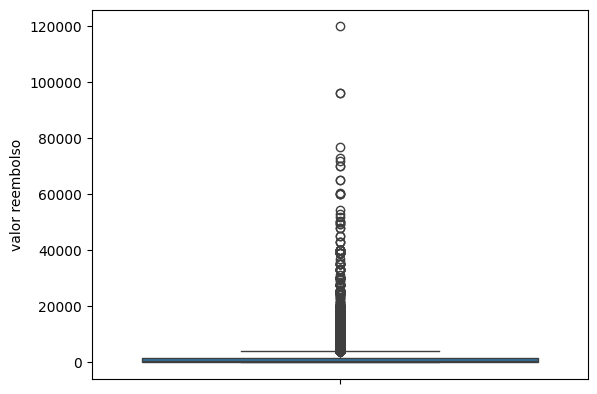

In [823]:
sb.boxplot(valor_reembolso)
plt.show()

In [824]:
import numpy as np

# Função para calcular o IQR
q75, q25 = np.percentile(valor_reembolso, [75 ,25])
IQR = q75 - q25

# Largura do bin pela regra de Freedman-Diaconis
bin_width = 2 * IQR / (len(valor_reembolso) ** (1 / 3))

# Número de bins
num_bins = int(np.ceil((valor_reembolso.max() - valor_reembolso.min()) / bin_width))

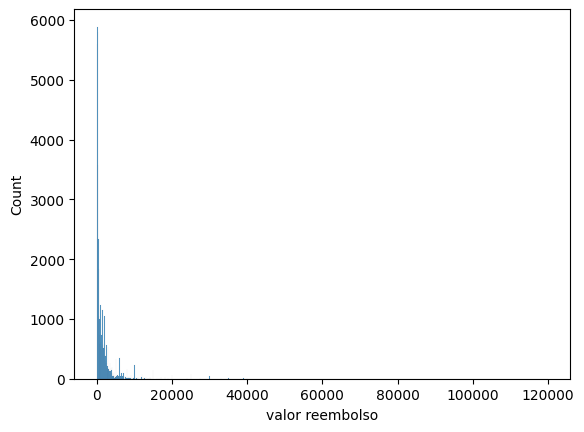

In [825]:
sb.histplot(valor_reembolso, bins=num_bins)
plt.show()

Removando outliers da colina valor reembolso

In [826]:




# Calcula Q1 (primeiro quartil) e Q3 (terceiro quartil)
Q1 = valor_reembolso.quantile(0.25)
Q3 = valor_reembolso.quantile(0.75)
IQR = Q3 - Q1

# Define limites para identificar os outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Remove outliers
df_sem_outliers = df_novo_5[(valor_reembolso>= limite_inferior) & (valor_reembolso<= limite_superior)]

print(df_sem_outliers)

             ano           senador  \
2     2022-01-01      ACIR GURGACZ   
4     2022-01-01      ACIR GURGACZ   
5     2022-01-01      ACIR GURGACZ   
6     2022-01-01      ACIR GURGACZ   
9     2022-01-01      ACIR GURGACZ   
...          ...               ...   
47719 2020-01-01  ZEQUINHA MARINHO   
47720 2020-01-01  ZEQUINHA MARINHO   
47721 2020-01-01  ZEQUINHA MARINHO   
47722 2020-01-01  ZEQUINHA MARINHO   
47723 2020-01-01  ZEQUINHA MARINHO   

                                                 despesa  \
2                    Divulgação da atividade parlamentar   
4                    Divulgação da atividade parlamentar   
5      Passagens aéreas, aquáticas e terrestres nacio...   
6      Aluguel de imóveis para escritório político, c...   
9                    Divulgação da atividade parlamentar   
...                                                  ...   
47719  Passagens aéreas, aquáticas e terrestres nacio...   
47720  Passagens aéreas, aquáticas e terrestres nacio...   
477

In [827]:
valor_reembolso_sem_outliers = df_sem_outliers['valor reembolso']

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


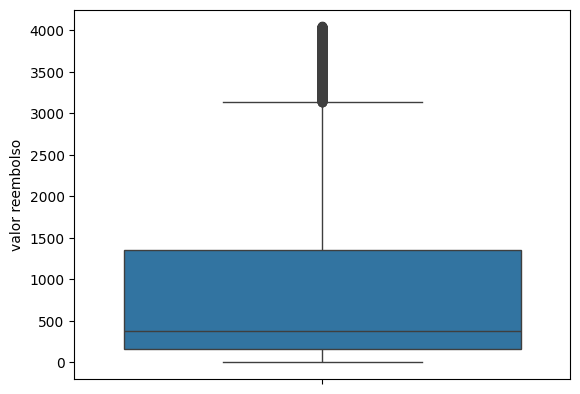

In [828]:
sb.boxplot(valor_reembolso_sem_outliers)
plt.show()

In [829]:
import numpy as np




# Número de bins pela regra de Rice
num_bins = int(np.ceil(2 * (len(valor_reembolso_sem_outliers) ** (1/3))))

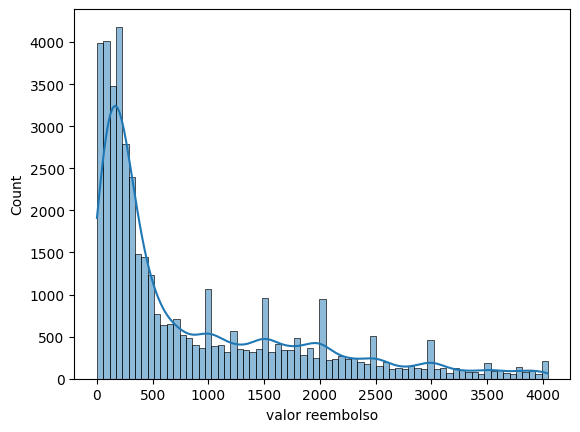

In [830]:
sb.histplot(valor_reembolso_sem_outliers, bins=num_bins, kde=True)
plt.show()

Qual foi o senador que mais declarou despesas

In [831]:
despesas= df_sem_outliers['despesa']
print(despesas)

2                      Divulgação da atividade parlamentar
4                      Divulgação da atividade parlamentar
5        Passagens aéreas, aquáticas e terrestres nacio...
6        Aluguel de imóveis para escritório político, c...
9                      Divulgação da atividade parlamentar
                               ...                        
47719    Passagens aéreas, aquáticas e terrestres nacio...
47720    Passagens aéreas, aquáticas e terrestres nacio...
47721    Passagens aéreas, aquáticas e terrestres nacio...
47722    Passagens aéreas, aquáticas e terrestres nacio...
47723    Passagens aéreas, aquáticas e terrestres nacio...
Name: despesa, Length: 43862, dtype: object


In [832]:
senador = df_sem_outliers['senador'].unique().tolist() # Use tolist() to convert the array to a list
print(senador)

['ACIR GURGACZ', 'ALESSANDRO VIEIRA', 'ALEXANDRE SILVEIRA', 'ALVARO DIAS', 'ANGELO CORONEL', 'ANTONIO ANASTASIA', 'CARLOS FÁVARO', 'CARLOS PORTINHO', 'CARLOS VIANA', 'CHICO RODRIGUES', 'CHIQUINHO FEITOSA', 'CID GOMES', 'CONFÚCIO MOURA', 'DANIELLA RIBEIRO', 'DÁRIO BERGER', 'DAVI ALCOLUMBRE', 'DRA. EUDÓCIA', 'EDUARDO BRAGA', 'EDUARDO GIRÃO', 'EDUARDO GOMES', 'EDUARDO VELLOSO', 'ELIANE NOGUEIRA', 'ELIZIANE GAMA', 'ELMANO FÉRRER', 'ESPERIDIÃO AMIN', 'FABIANO CONTARATO', 'FABIO GARCIA', 'FERNANDO BEZERRA COELHO', 'FERNANDO COLLOR', 'FERNANDO DUEIRE', 'FLÁVIO ARNS', 'FLÁVIO BOLSONARO', 'GIORDANO', 'GUARACY SILVEIRA', 'HUMBERTO COSTA', 'IRAJÁ', 'IVETE DA SILVEIRA', 'IZALCI LUCAS', 'JADER BARBALHO', 'JAQUES WAGNER', 'JARBAS VASCONCELOS', 'JAYME CAMPOS', 'JEAN PAUL PRATES', 'JORGINHO MELLO', 'JOSÉ SERRA', 'JULIO VENTURA', 'KÁTIA ABREU', 'LASIER MARTINS', 'LEILA BARROS', 'LUCAS BARRETO', 'LUIS CARLOS HEINZE', 'LUIZ CARLOS DO CARMO', 'LUIZ PASTORE', 'MAILZA GOMES', 'MARA GABRILLI', 'MARCELO CASTR

In [833]:
df_sem_outliers.columns

Index(['ano', 'senador', 'despesa', 'fornecedot', 'detalhe',
       'valor reembolso'],
      dtype='object')

Vendo qual foi o senador que mais teve despesas

In [834]:

contagem_despesa_por_senador = df_sem_outliers.groupby('senador')['despesa'].count()
contagem_despesa_por_senador = contagem_despesa_por_senador[0:3]

In [835]:
contagem_despesa_por_senador

,despesa
senador,
ACIR GURGACZ,428
ALESSANDRO VIEIRA,503
ALEXANDRE SILVEIRA,225


In [836]:
despesa= contagem_despesa_por_senador.values
print(despesa)

[428 503 225]


In [837]:
senador= contagem_despesa_por_senador.index
senador = senador[0:3]

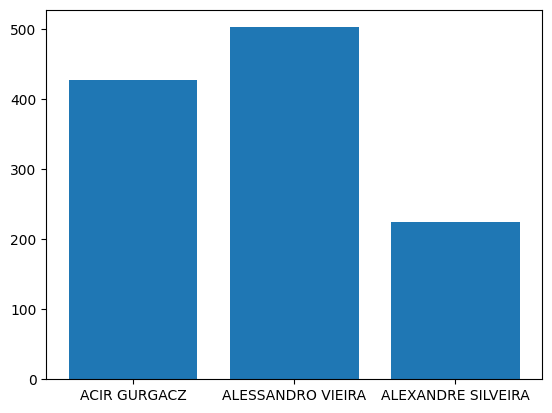

In [838]:
plt.bar(senador, despesa)
plt.show()

Qual a percentagem de cotas gasto por senadores? Teve algum com mais de 90%?

In [839]:
df_sem_outliers.columns

Index(['ano', 'senador', 'despesa', 'fornecedot', 'detalhe',
       'valor reembolso'],
      dtype='object')

In [840]:
cota_por_senador = df_sem_outliers.groupby('senador').apply(lambda i:i['valor reembolso']/i['valor reembolso'].sum() *100)
cota_por_senador= round(cota_por_senador, 3)

<ipython-input-840-f66af4aa074b>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cota_por_senador = df_sem_outliers.groupby('senador').apply(lambda i:i['valor reembolso']/i['valor reembolso'].sum() *100)


In [841]:
cota_por_senador

senador                
ACIR GURGACZ      2        0.233
                  4        0.155
                  5        0.310
                  6        0.155
                  9        0.233
                           ...  
ZEQUINHA MARINHO  47719    0.005
                  47720    0.202
                  47721    0.137
                  47722    0.067
                  47723    0.101
Name: valor reembolso, Length: 43862, dtype: float64

In [842]:
senador = cota_por_senador.index
cota= cota_por_senador.values

Qual foi a média dos valores reembolsados por ano

In [843]:
df_sem_outliers.columns

Index(['ano', 'senador', 'despesa', 'fornecedot', 'detalhe',
       'valor reembolso'],
      dtype='object')

In [844]:
media_por_ano = df_sem_outliers.groupby(
'ano')['valor reembolso'].mean()

In [845]:
print(media_por_ano)

ano
2020-01-01    729.256594
2021-01-01    853.179965
2022-01-01    934.786241
Name: valor reembolso, dtype: float64


Em que ano teve os maiores reembolsos

In [846]:
df_reembolso_por_ano = df_sem_outliers[[
'ano', 'valor reembolso']]

In [847]:
print(df_reembolso_por_ano)

             ano  valor reembolso
2     2022-01-01          1500.00
4     2022-01-01          1000.00
5     2022-01-01          2000.00
6     2022-01-01          1000.36
9     2022-01-01          1500.00
...          ...              ...
47719 2020-01-01            44.76
47720 2020-01-01          1654.46
47721 2020-01-01          1121.83
47722 2020-01-01           549.47
47723 2020-01-01           831.05

[43862 rows x 2 columns]


In [848]:
df_reembolso_por_ano = pd.DataFrame(df_reembolso_por_ano)

In [849]:
df_reembolso_por_ano

,ano,valor reembolso
2,2022-01-01,1500.00
4,2022-01-01,1000.00
5,2022-01-01,2000.00
6,2022-01-01,1000.36
9,2022-01-01,1500.00
...,...,...
47719,2020-01-01,44.76
47720,2020-01-01,1654.46
47721,2020-01-01,1121.83
47722,2020-01-01,549.47


In [850]:
df_reembolso_por_ano.columns

Index(['ano', 'valor reembolso'], dtype='object')

In [851]:
maiores_reembolso_por_ano = df_reembolso_por_ano.groupby('ano').apply(lambda x: x[x['valor reembolso'] == x['valor reembolso'].max()])

<ipython-input-851-310a9c187560>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  maiores_reembolso_por_ano = df_reembolso_por_ano.groupby('ano').apply(lambda x: x[x['valor reembolso'] == x['valor reembolso'].max()])


In [852]:
maiores_reembolso_por_ano

ano  valor reembolso
ano                                         
2020-01-01 39989 2020-01-01          4040.31
2021-01-01 31062 2021-01-01          4042.50
           31065 2021-01-01          4042.50
           31069 2021-01-01          4042.50
           31077 2021-01-01          4042.50
           31089 2021-01-01          4042.50
           31094 2021-01-01          4042.50
           31105 2021-01-01          4042.50
           31124 2021-01-01          4042.50
2022-01-01 906   2022-01-01          4046.01

Qual é a distribuição dos valores reembolsados

In [853]:
import statistics as st

In [854]:
valores_reembolso = df_sem_outliers['valor reembolso']

In [855]:
distribuicao_valores_reembolso = st.stdev(valores_reembolso)
distribuicao_valores_reembolso = round(distribuicao_valores_reembolso, 2)

In [856]:
print(distribuicao_valores_reembolso)

951.55


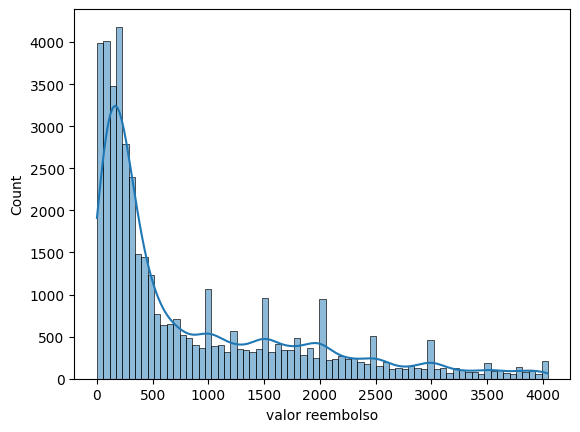

In [857]:
sb.histplot(valores_reembolso, bins=num_bins, kde=True)
plt.show()

In [858]:
df_novo_6 = pd.read_csv('/content/drive/MyDrive/csv/dataset_ceaps_forecasting.csv')

In [859]:
print(df_novo_6)

              ds          y
0     2018-01-01   13062.46
1     2018-01-02   61972.66
2     2018-01-03   54424.44
3     2018-01-04   21775.57
4     2018-01-05   41703.32
...          ...        ...
1456  2021-12-27   28552.41
1457  2021-12-28  154547.27
1458  2021-12-29   22495.76
1459  2021-12-30  118345.56
1460  2021-12-31   27219.41

[1461 rows x 2 columns]


In [860]:
df_novo_6.isnull().sum()

,0
ds,0
y,0


In [861]:
# Convert the 'ds' column to datetime objects
df_novo_6['ds'] = pd.to_datetime(df_novo_6['ds'])

# Now you can extract the year
ano = df_novo_6['ds']
valor_reembolso= df_novo_6['y']

print(ano)

0      2018-01-01
1      2018-01-02
2      2018-01-03
3      2018-01-04
4      2018-01-05
          ...    
1456   2021-12-27
1457   2021-12-28
1458   2021-12-29
1459   2021-12-30
1460   2021-12-31
Name: ds, Length: 1461, dtype: datetime64[ns]


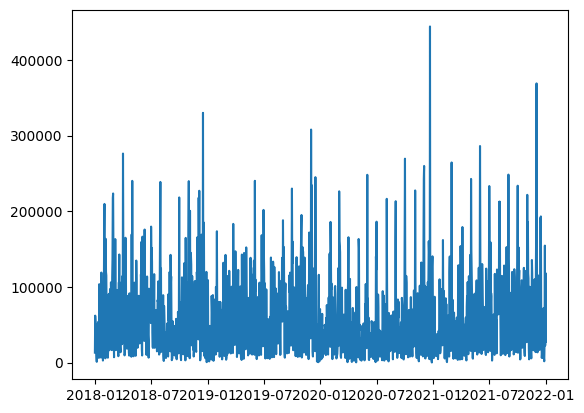

In [862]:
plt.plot(ano, valor_reembolso)

In [863]:
from statsmodels.tsa.stattools import adfuller

# Suponha que você tenha uma série temporal
# Selecione a coluna 'y' do DataFrame para o teste
valor_reembolso = df_novo_6['y']

# Executa o teste Dickey-Fuller
result = adfuller(valor_reembolso)

# Resultado
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

ADF Statistic: -7.526437
p-value: 0.000000
Critical Values:
   1%, -3.4349024693573584
Critical Values:
   5%, -2.8635506057382325
Critical Values:
   10%, -2.5678404322793846


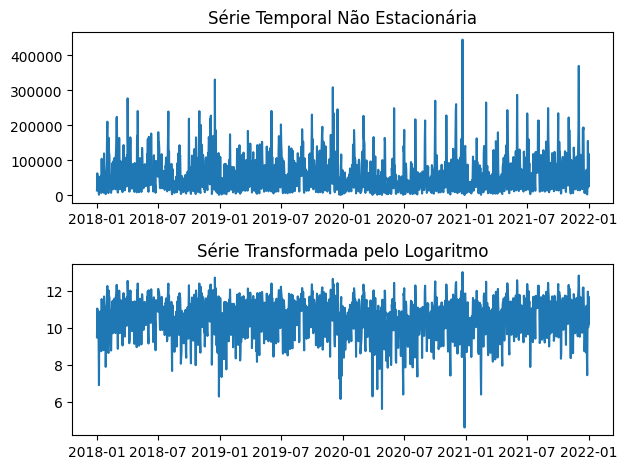

In [864]:
import numpy as np

# Transformação logarítmica
log_data = np.log(valor_reembolso)

# Plotando a série original e a transformada
plt.subplot(211)
plt.plot(ano, valor_reembolso)
plt.title('Série Temporal Não Estacionária')

plt.subplot(212)
plt.plot(ano,log_data)
plt.title('Série Transformada pelo Logaritmo')
plt.tight_layout()
plt.show()

In [865]:
from statsmodels.tsa.stattools import adfuller

# Suponha que você tenha uma série temporal
# Selecione a coluna 'y' do DataFrame para o teste
#valor_reembolso = df_novo_6['y']

# Executa o teste Dickey-Fuller
result = adfuller(log_data)

# Resultado
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
   if result[0] < value: # Compare the test statistic to each critical value
      print('Critical Values:')
      print(f'   {key}, {value}')
   else:
     print('teste falhou')

ADF Statistic: -6.380013
p-value: 0.000000
Critical Values:
   1%, -3.434908816804013
Critical Values:
   5%, -2.863553406963303
Critical Values:
   10%, -2.5678419239852994


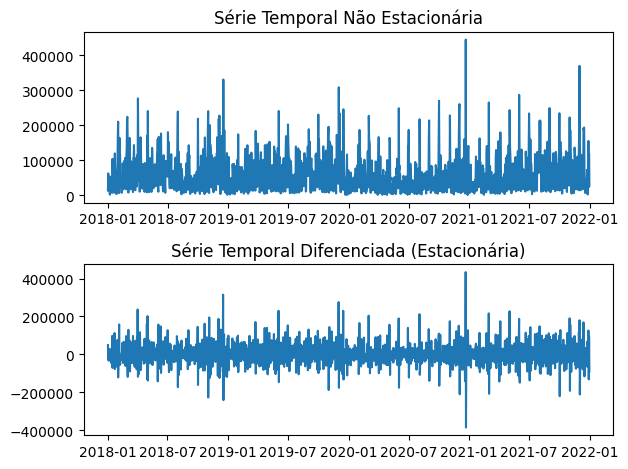

In [866]:
# Plotando a série original
plt.subplot(211)
plt.plot(ano, valor_reembolso)
plt.title('Série Temporal Não Estacionária')

# Aplicando a primeira diferenciação
diff_data = valor_reembolso.diff().dropna()

# Plotando a série diferenciada
plt.subplot(212)
# Use ano[1:] to ensure both variables have the same length
plt.plot(ano[1:],diff_data)
plt.title('Série Temporal Diferenciada (Estacionária)')
plt.tight_layout()
plt.show()

In [867]:
from statsmodels.tsa.stattools import adfuller

# Suponha que você tenha uma série temporal
# Selecione a coluna 'y' do DataFrame para o teste
#valor_reembolso = df_novo_6['y']

# Executa o teste Dickey-Fuller
result = adfuller(diff_data)

# Resultado
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
   if result[0] < value: # Compare the test statistic to each critical value
      print('Critical Values:')
      print(f'   {key}, {value}')
   else:
     print('teste falhou')

ADF Statistic: -12.660610
p-value: 0.000000
Critical Values:
   1%, -3.4349151819757466
Critical Values:
   5%, -2.863556216004778
Critical Values:
   10%, -2.5678434198545568


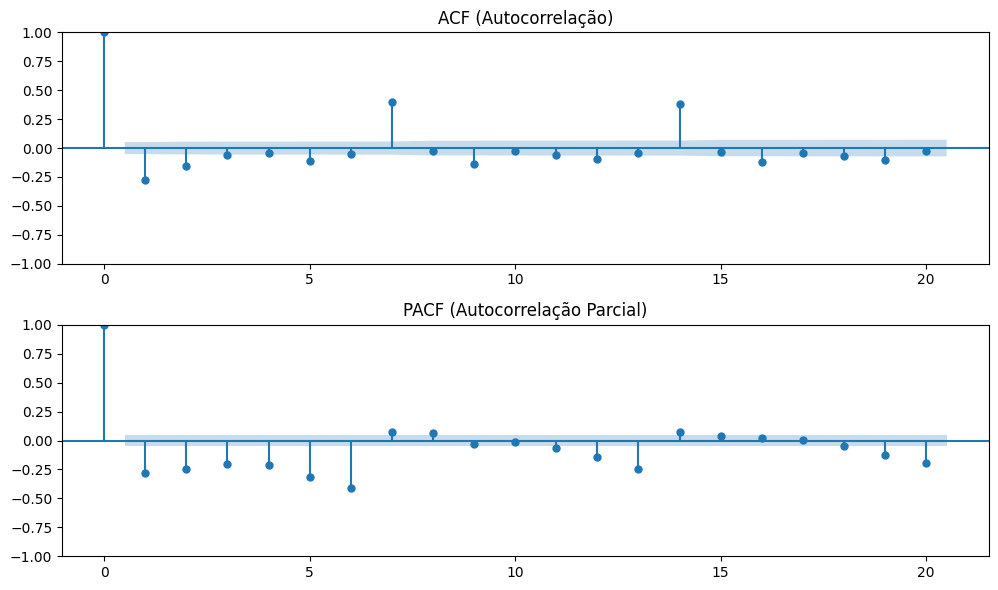

In [868]:
import numpy as np
import matplotlib.pyplot as plt # Make sure matplotlib is imported
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Import the required functions

# 2. Plotar a Função de Autocorrelação (ACF) e a Função de Autocorrelação Parcial (PACF)
# Isso nos ajuda a encontrar p e q

# Gráfico da ACF (para determinar q)
plt.figure(figsize=(10,6))
plt.subplot(211)
plot_acf(diff_data, ax=plt.gca(), lags=20)
plt.title('ACF (Autocorrelação)')

# Gráfico da PACF (para determinar p)
plt.subplot(212)
plot_pacf(diff_data, ax=plt.gca(), lags=20)
plt.title('PACF (Autocorrelação Parcial)')

plt.tight_layout()
plt.show()

In [874]:
import numpy as np
#import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

# Gerar uma série temporal simulada
#np.random.seed(42)
#data = pd.Series(np.random.randn(100).cumsum() + 100, name='dados')

# Treinar um modelo ARIMA simples (p=1, d=1, q=1)
model = ARIMA(diff_data, order=(1, 1, 1))
model_fit = model.fit()

# Fazer previsões (previsões em uma janela de 10 passos à frente)
previsoes = model_fit.forecast(steps=10)
print(previsoes)


# Gerar valores reais fictícios para comparação (em um cenário real, estes seriam os dados reais)
valores_reais = diff_data[-10:].values

# Calcular o MAPE
mape = mean_absolute_percentage_error(valores_reais, previsoes)
print(f'MAPE: {mape:.2f}%')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


1460    25335.035416
1461    -7005.719576
1462     1975.164739
1463     -518.787028
1464      173.772323
1465      -18.548339
1466       34.858257
1467       20.027482
1468       24.145922
1469       23.002250
Name: predicted_mean, dtype: float64
MAPE: 1.51%


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


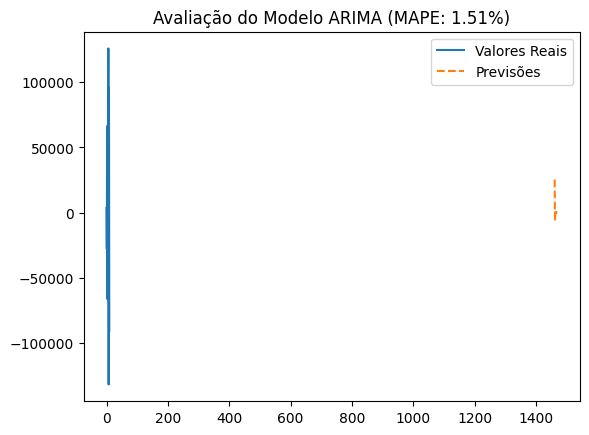

In [870]:
# Visualizar a previsão vs valores reais
plt.plot(valores_reais, label='Valores Reais')
plt.plot(previsoes, label='Previsões', linestyle='--')
plt.title(f'Avaliação do Modelo ARIMA (MAPE: {mape:.2f}%)')
plt.legend()
plt.show()

In [871]:
#import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
#import matplotlib.pyplot as plt

# Suponha que você tenha uma série temporal com sazonalidade
#data = pd.Series([10, 12, 14, 13, 16, for 19, 18, 21])

# Definindo o modelo SARIMAX (p=1, d=1, q=1) e sazonalidade (P=1, D=1, Q=1, Sazonalidade=4)
model = SARIMAX(diff_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 4))

# Ajusta o modelo
model_fit = model.fit()

# Sumário do modelo
#print(model_fit.summary())

# Previsão futura
previsao = model_fit.forecast(steps=5)

print(previsao)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


1460    14506.633206
1461     5828.424235
1462    -4323.696602
1463     1129.066263
1464     2915.666341
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


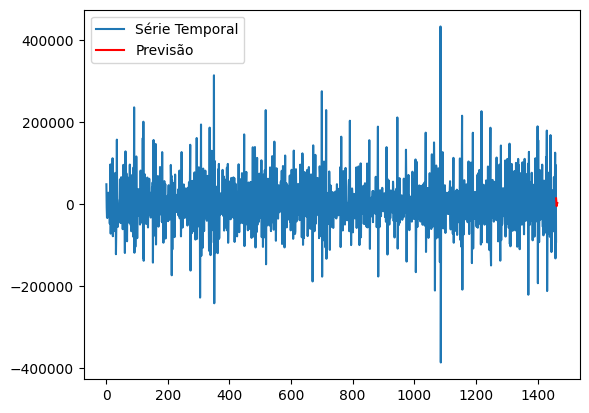

In [872]:
# Visualizando a previsão
plt.plot(diff_data, label='Série Temporal')
plt.plot(range(len(diff_data), len(diff_data) + 5), previsao, label='Previsão', color='red')
plt.legend()
plt.show()

In [873]:
from sklearn.metrics import mean_absolute_percentage_error
# Gerar valores reais fictícios para comparação (em um cenário real, estes seriam os dados reais)
# Take only the last 5 values to match the length of previsao
valores_reais = diff_data[-5:].values

# Calcular o MAPE
mape = mean_absolute_percentage_error(valores_reais, previsao)
print(f'MAPE: {mape:.2f}%')

MAPE: 0.88%
